In [1]:
import numpy as np
import pandas as pd
import squarify
import matplotlib
import matplotlib.pyplot as plt

In [166]:
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 2000

In [167]:
%%html
<style>
.dataframe td {
    white-space: nowrap;
}
</style>

## Import Data
### Replenishments number by locations

In [4]:
df_repl = pd.read_csv('In/Replenishment.csv', sep =',', index_col = 0)
print('{:,} records'.format(len(df_repl)))
df_repl.head()

8,099 records


,DAY,SKU,Location,Alley,AlleyCell,Max,Min,WEEK-1,WEEK-2,WEEK-3,WEEK-4,WEEK-5,Capacity
0,FRI,2354,A0617402,A06,A0617,80.0,60.0,0.0,1.0,1.0,0.0,0.0,20
1,FRI,5028,A0703503,A07,A0703,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,FRI,8972,A0527401,A05,A0527,120.0,90.0,1.0,2.0,0.0,1.0,0.0,30
3,FRI,10116,A0742501,A07,A0742,144.0,108.0,0.0,1.0,0.0,0.0,0.0,36
4,FRI,11259,A0608303,A06,A0608,200.0,150.0,1.0,3.0,2.0,0.0,0.0,50


## Plot Split of Replenishment
### Process the Dataframe

In [17]:
# Filter by Week Number
wk = 'WEEK-2'
df_plot = df_repl[df_repl[wk]>0][['Alley', wk]].copy()
print('{:,} records'.format(len(df_plot)))
df_plot.head()

4,325 records


,Alley,WEEK-2
0,A06,1.0
2,A05,2.0
3,A07,1.0
4,A06,3.0
5,A05,1.0


In [18]:
# Unique Alleys
print(list(df_plot.Alley.unique()))
dict_color = dict(zip(['A05', 'A06', 'A04', 'A07', 'A02', 'R04', 'A01', 'A08', 
                       'R05', 'A03', 'A09', 'A10', 'H02', 'B03', 'A11', 'R06']
                      , ['blue', 'red', 'yellow', 'orange', 'brown', 'cyan', 'tab:blue', 'tab:red', 
 'lightblue', 'tab:orange', 'grey', 'tab:green', 'purple', 'darkblue', 'white', 'magenta']))

['A06', 'A05', 'A07', 'A04', 'A02', 'R04', 'A08', 'A03', 'A01', 'R05', 'A09', 'A10', 'H02', 'B03', 'A11', 'R06']


In [19]:
# Processing
df_plot = pd.DataFrame(df_plot.groupby(['Alley'])[wk].sum())
df_plot['%'] = (100*df_plot[wk]/df_plot[wk].sum()).round(2)
df_plot.reset_index(inplace = True)
df_plot['LABEL'] = df_plot[['Alley','%']].apply(lambda t: t['Alley'] +'\n' + str(t['%']) + '%', axis = 1)
df_plot.head()

,Alley,WEEK-2,%,LABEL
0,A01,127.0,0.57,A01\n0.57%
1,A02,1238.0,5.52,A02\n5.52%
2,A03,1077.0,4.80,A03\n4.8%
3,A04,3020.0,13.46,A04\n13.46%
4,A05,899.0,4.01,A05\n4.01%


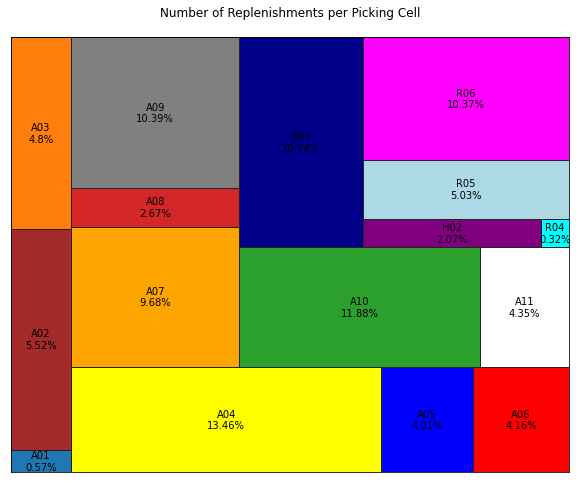

In [22]:
# Plot
plt.figure(figsize=(10, 8))
tree_map = squarify.plot(sizes = df_plot[wk], color = df_plot['Alley'].map(dict_color)
            , label = df_plot['LABEL']
            , edgecolor="#222222", text_kwargs={'fontsize':10})
plt.axis('on')
plt.title('Number of Replenishments per Picking Cell' +'\n', fontsize=12)
tree_map.axes.xaxis.set_visible(False)
tree_map.axes.yaxis.set_visible(False)
plt.show()